# Importing necessary libraries

In [122]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")
from wordcloud import WordCloud

## Importing the dataset

In [34]:
df = pd.read_csv("/Users/prabhatlachhar/Downloads/amazon_prime_titles 2.csv", index_col = 0)

In [35]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...
s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."


### Sanity Check of data

In [11]:
df.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, s1 to s9668
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 906.4+ KB


In [13]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [14]:
df.isnull().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df.shape[0]

9668

In [17]:
df.isnull().sum()/df.shape[0]

type            0.000000
title           0.000000
director        0.215453
cast            0.127534
country         0.930492
date_added      0.983968
release_year    0.000000
rating          0.034857
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [20]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

20.83913190657088

<Axes: ylabel='show_id'>

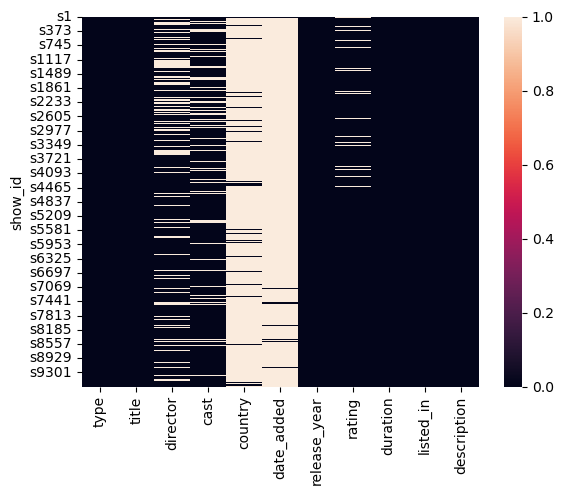

In [22]:
#Graphical Representation 

sns.heatmap(df.isnull())

In [76]:
#Filling missing value with "Unknown"

df['director']= df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


# lets fill the columns 'date_added' and 'ratings' with mode
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0]) 
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [87]:
#convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



In [126]:
#check for duplicates

df.duplicated().sum()


0

# EDA

Descriptive Statistics 

In [98]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
type,9668,2,Movie,7814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,9668,9668,The Grand Seduction,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,9668,5774,Unknown,2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,9668,7928,Unknown,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,9668,87,Unknown,8996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,9668,NaN,NaN,NaN,2021-03-31 17:00:25.320645376,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-03-30 00:00:00,2021-10-10 00:00:00,NaN
release_year,9668.0,NaN,NaN,NaN,2008.341849,1920.0,2007.0,2016.0,2019.0,2021.0,18.922482
rating,9668,24,13+,2454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,9668,219,1 Season,1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,9668,518,Drama,986,NaN,NaN,NaN,NaN,NaN,NaN,NaN


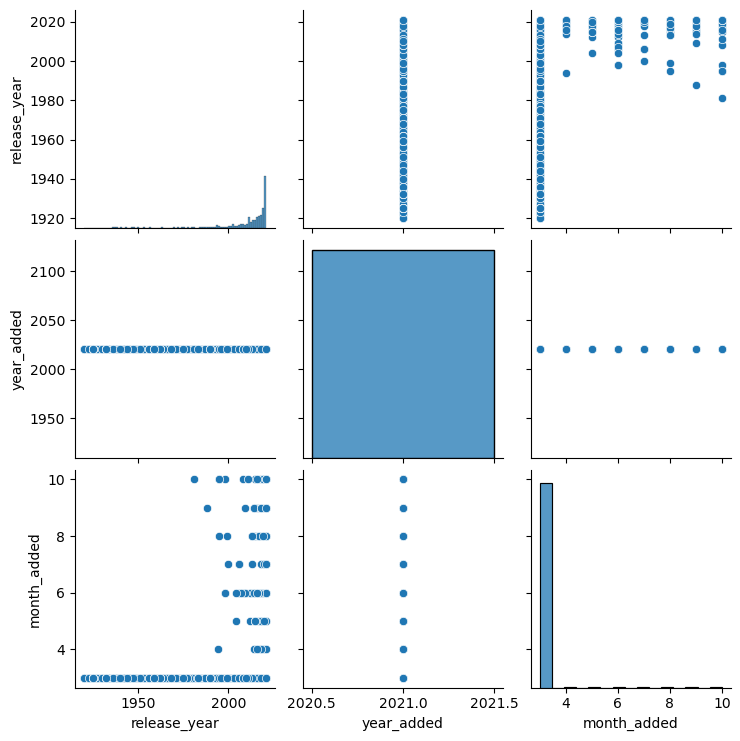

In [100]:
sns.pairplot(df)
plt.show()

Histogram to under the disctribution 

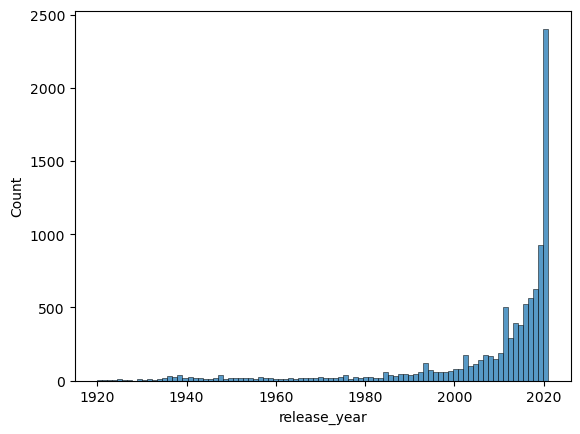

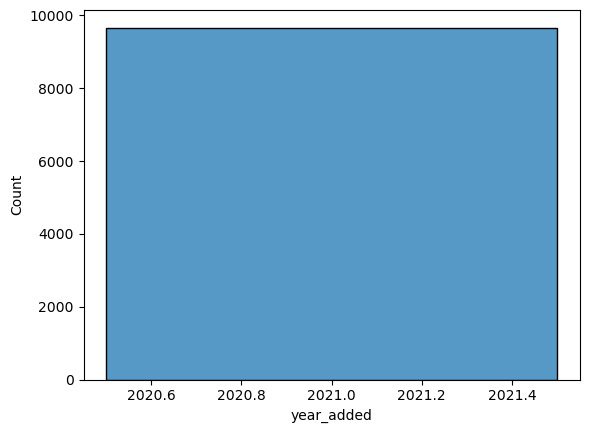

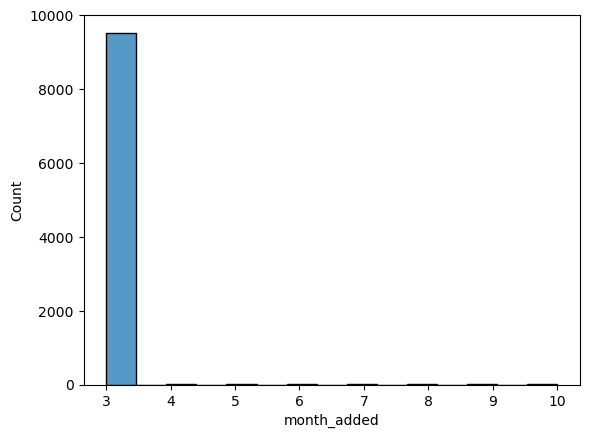

In [102]:

for i in df.select_dtypes( include = 'number').columns:
    sns.histplot(data = df,x=i)
    plt.show()

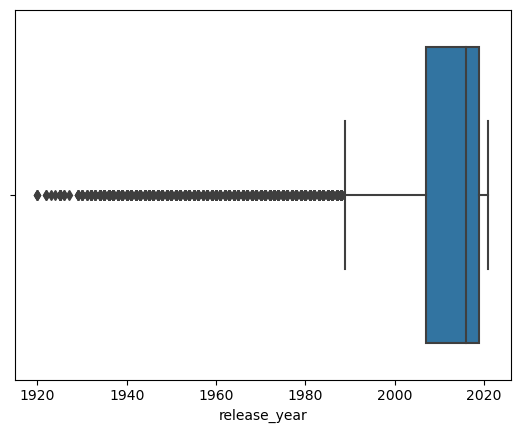

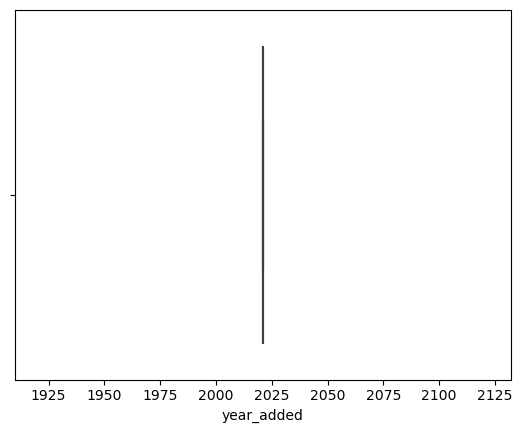

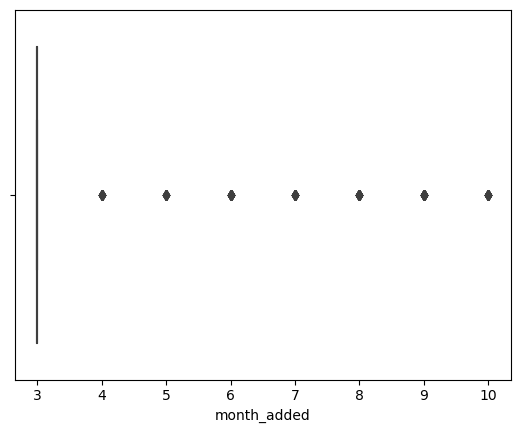

In [105]:
#boxplot to identify outliers
for i in df.select_dtypes( include = "number").columns:
    sns.boxplot(data = df, x= i )
    plt.show()

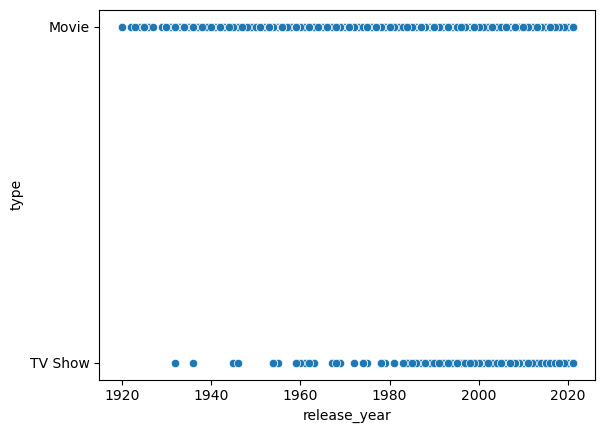

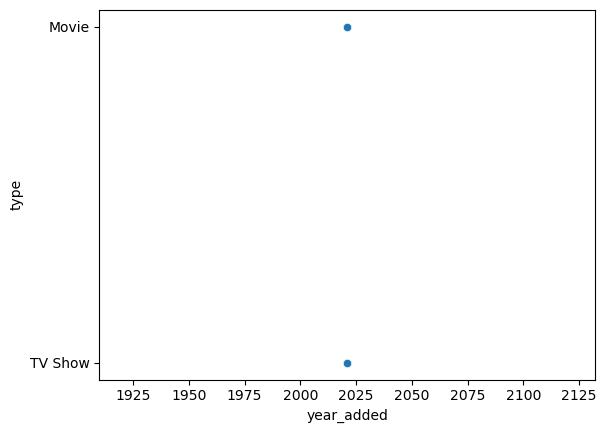

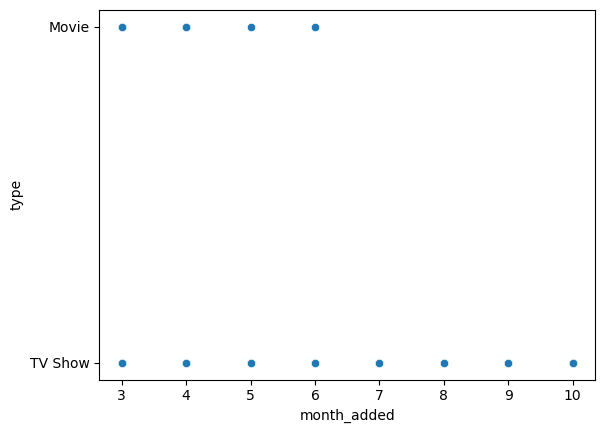

In [106]:
#scatterplot to understand the relationship
for i in df.select_dtypes( include = 'number' ).columns:
    sns.scatterplot(data = df,x = i,y = 'type' )
    plt.show()


## Titles by type


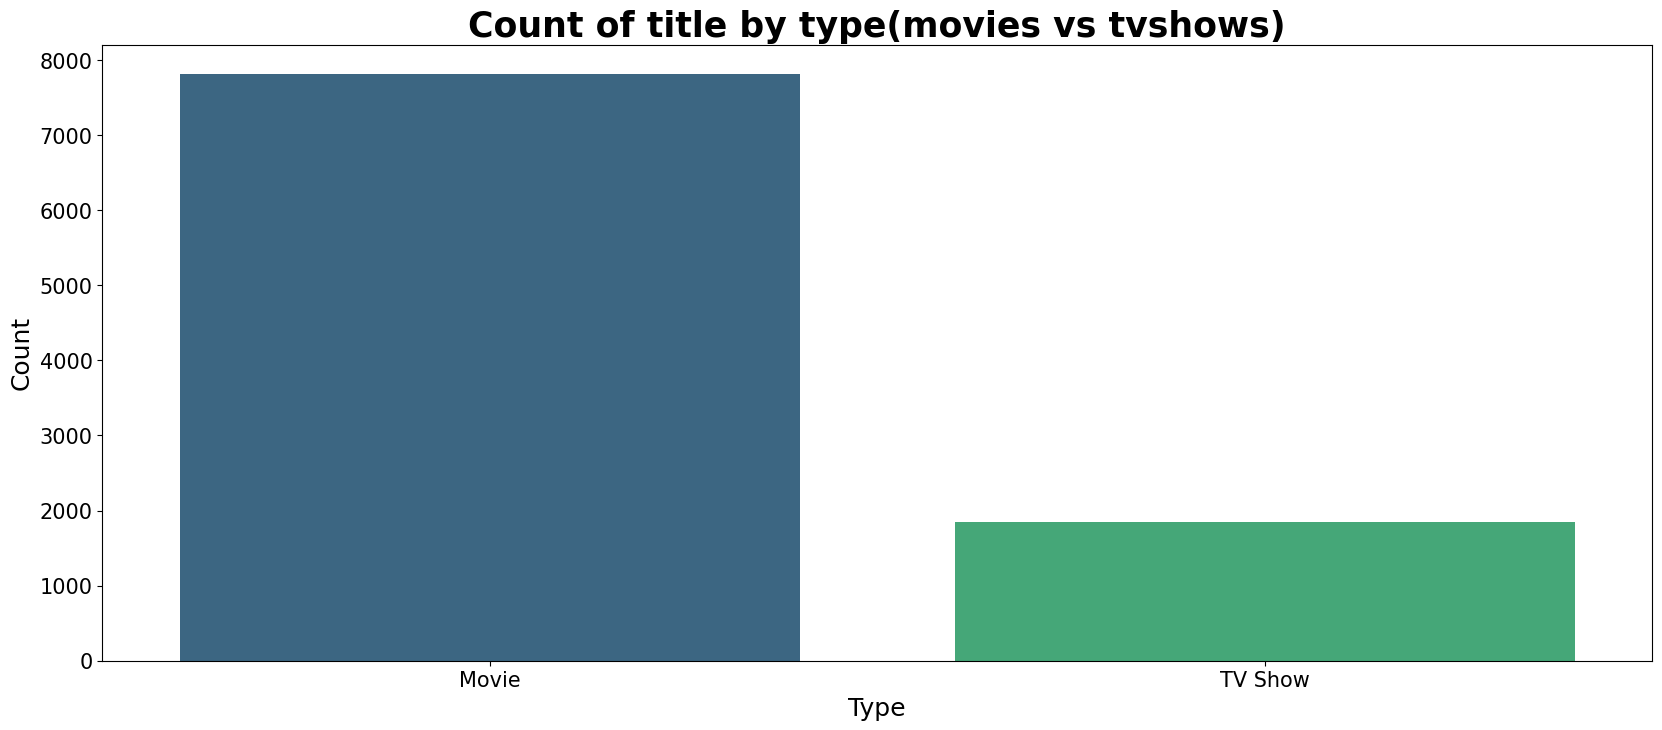

In [109]:
plt.figure(figsize = (20,8))
sns.countplot(x='type',data = df, palette = 'viridis')
plt.title('Count of title by type(movies vs tvshows)', fontweight = "bold" , fontsize = 25)
plt.xlabel('Type', fontsize = 18)
plt.ylabel('Count', fontsize =18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Count of titles by ratings 

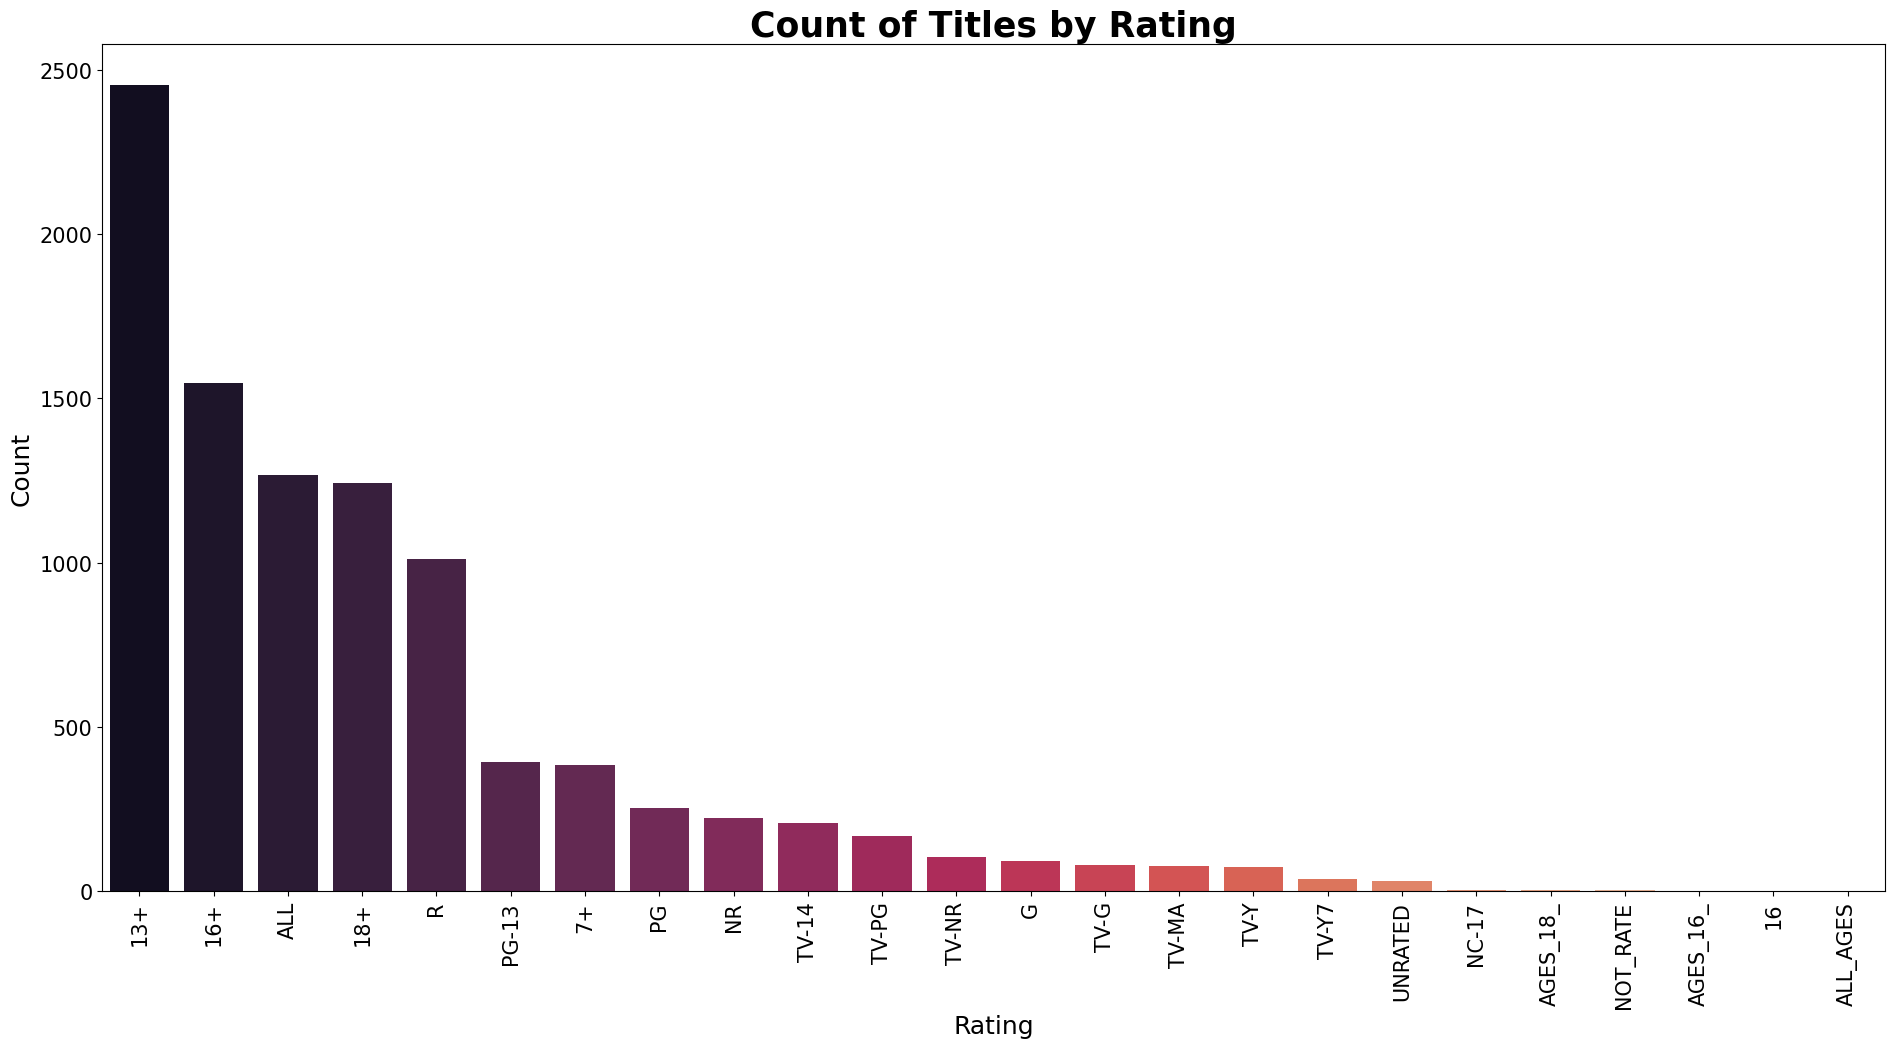

In [112]:
plt.figure(figsize = (23, 11))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')
plt.title('Count of Titles by Rating', fontweight = "bold", fontsize = 25)
plt.xlabel('Rating', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation=90)
plt.show()

## Most frequent Directors

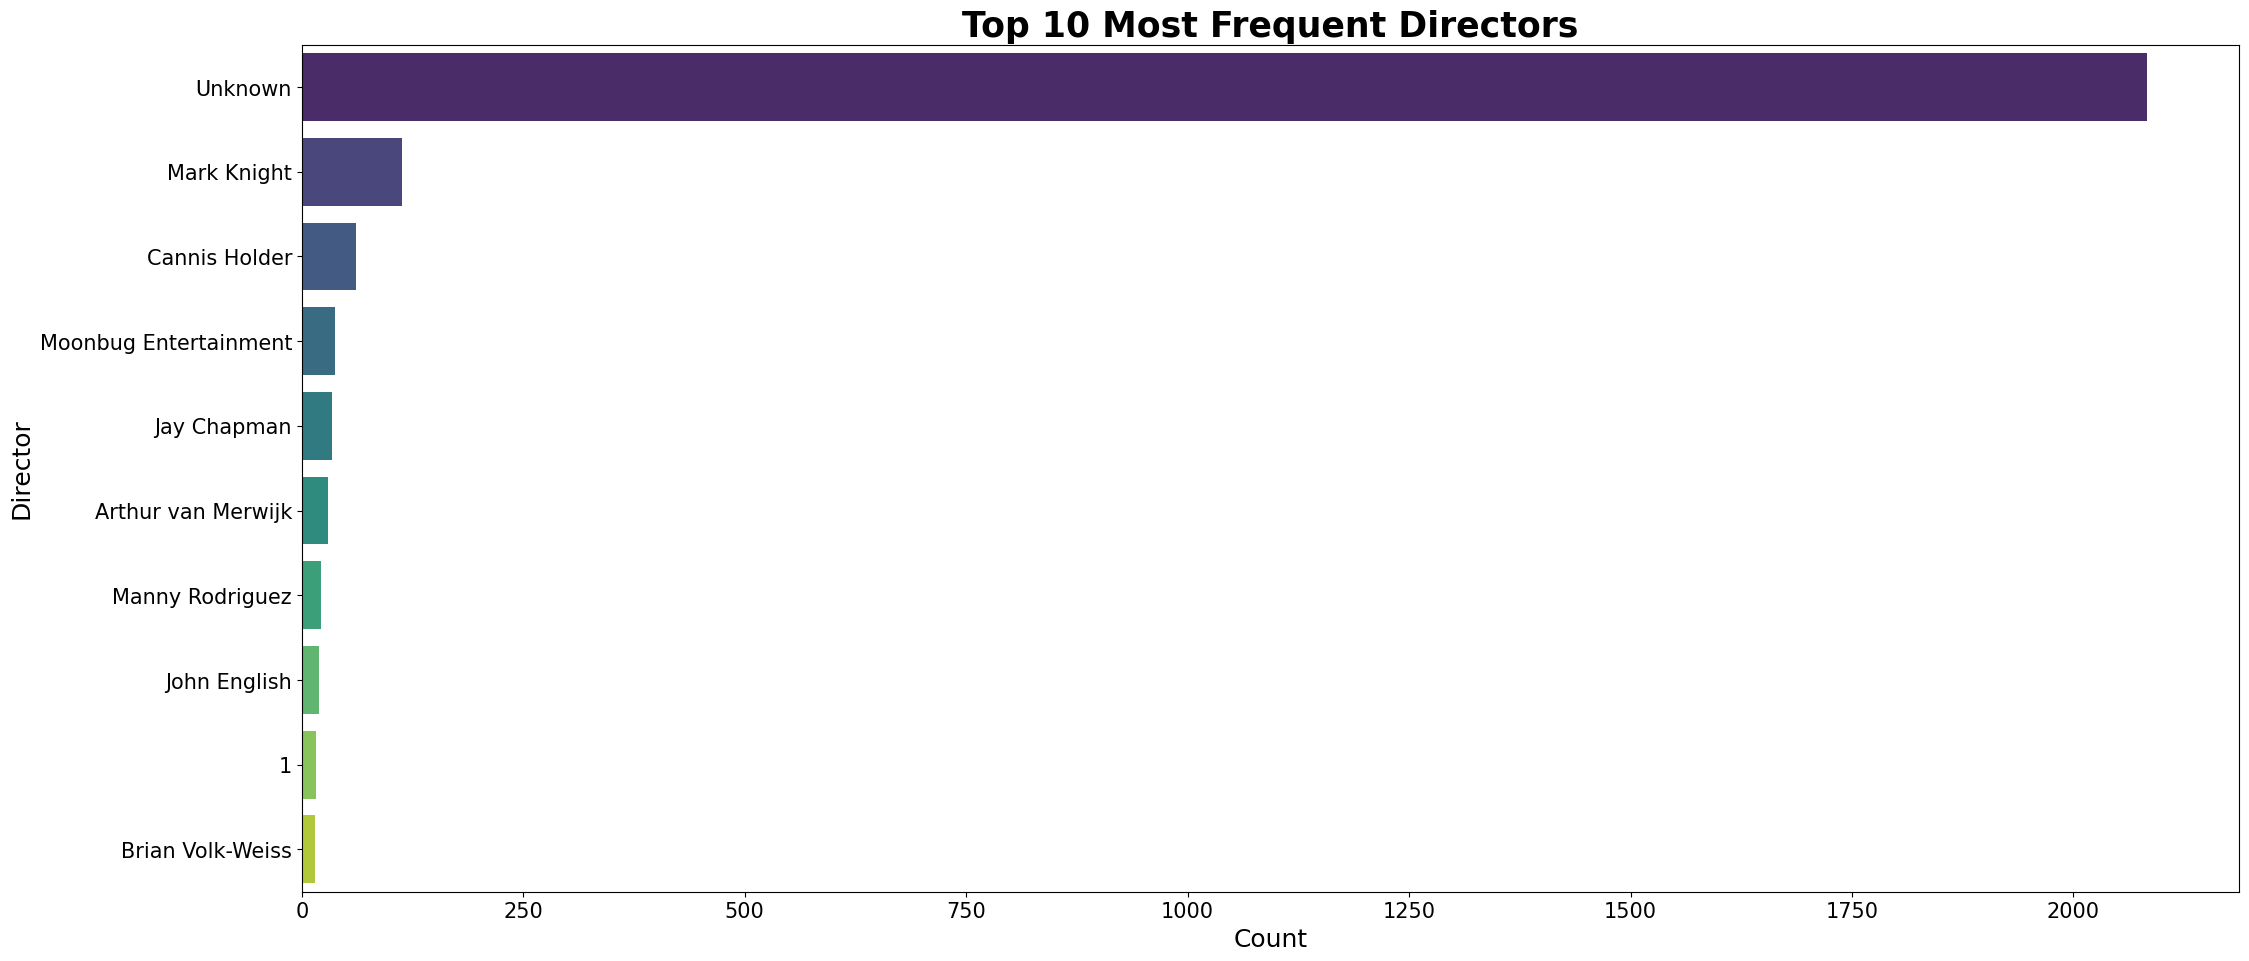

In [113]:
top_directors = df['director'].value_counts().nlargest(10)
plt.figure(figsize = (25, 11))
sns.barplot(y = top_directors.index, x = top_directors.values, palette='viridis')
plt.title('Top 10 Most Frequent Directors', fontweight = "bold", fontsize = 25)
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Director', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Distribution of release year

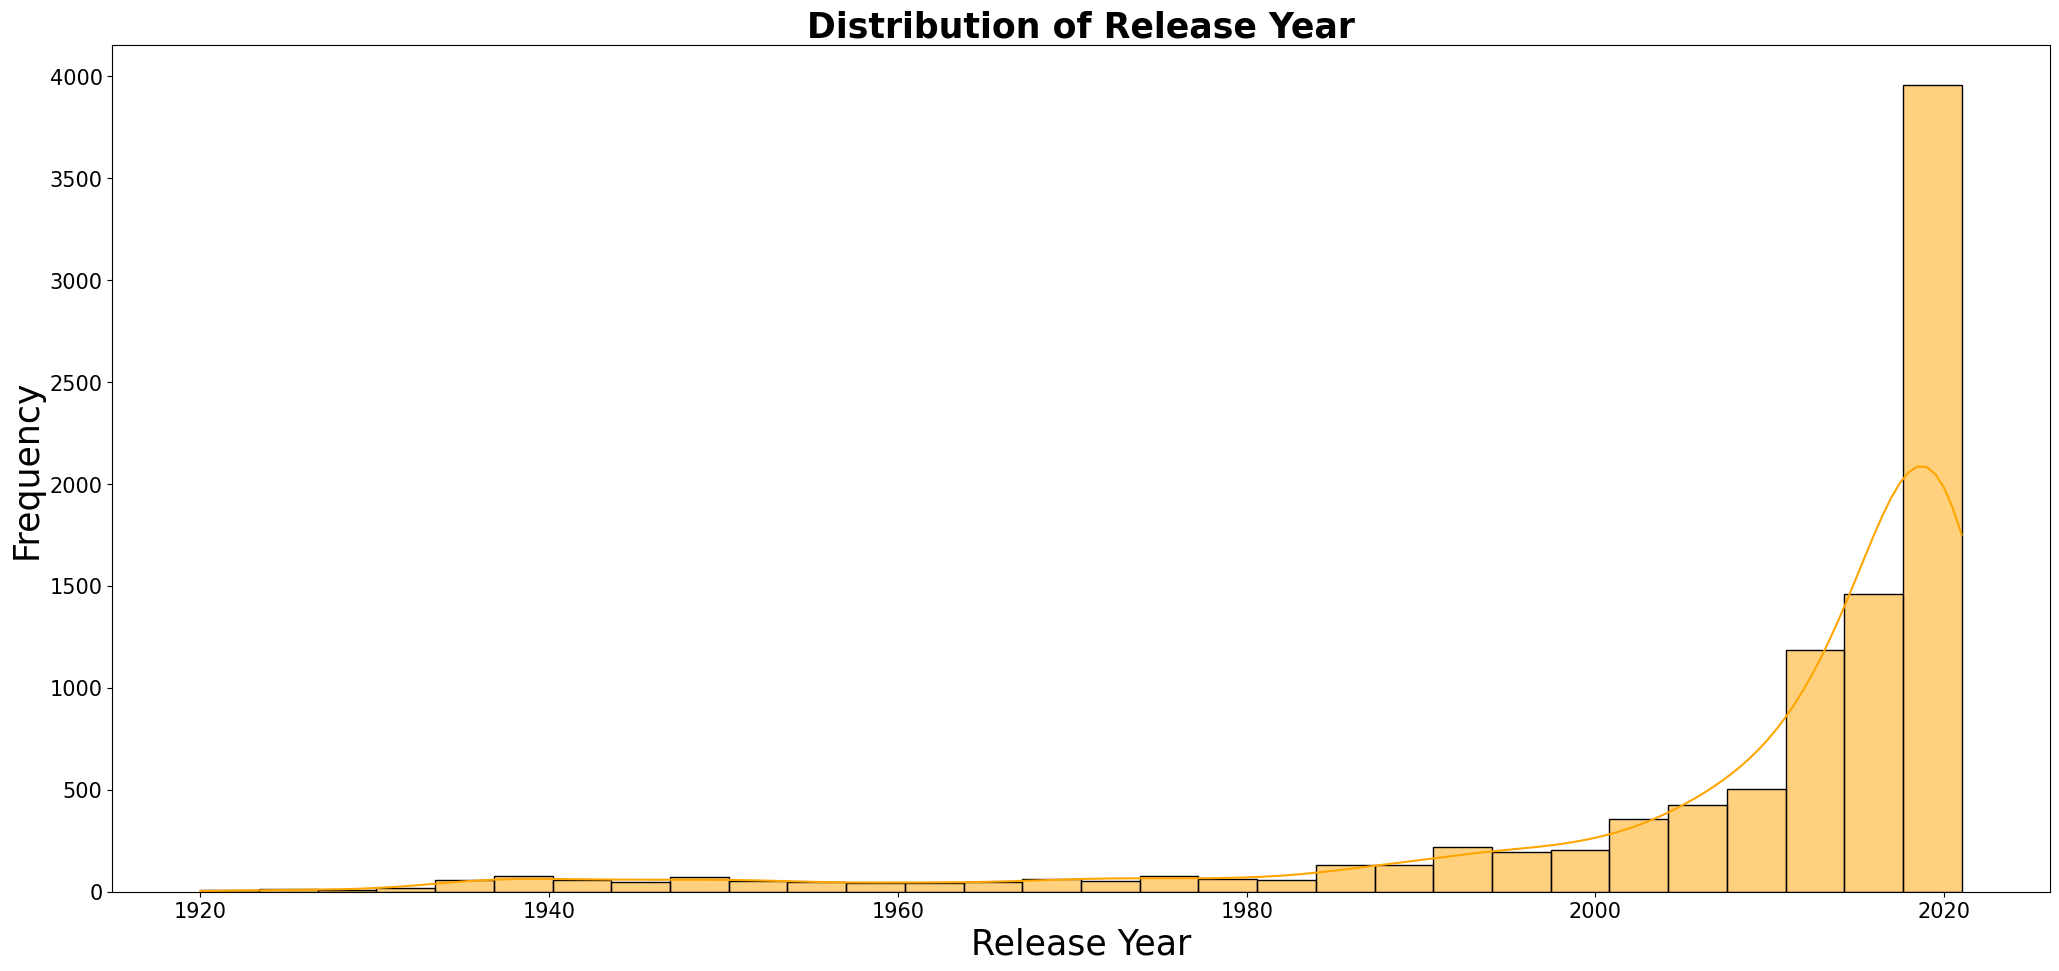

In [119]:
plt.figure(figsize = (25, 11))
sns.histplot(df['release_year'], bins = 30, kde = True, color = 'orange')
plt.title('Distribution of Release Year', fontweight = "bold", fontsize = 25)
plt.xlabel('Release Year', fontsize = 25)
plt.ylabel('Frequency', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Titles distribution by type

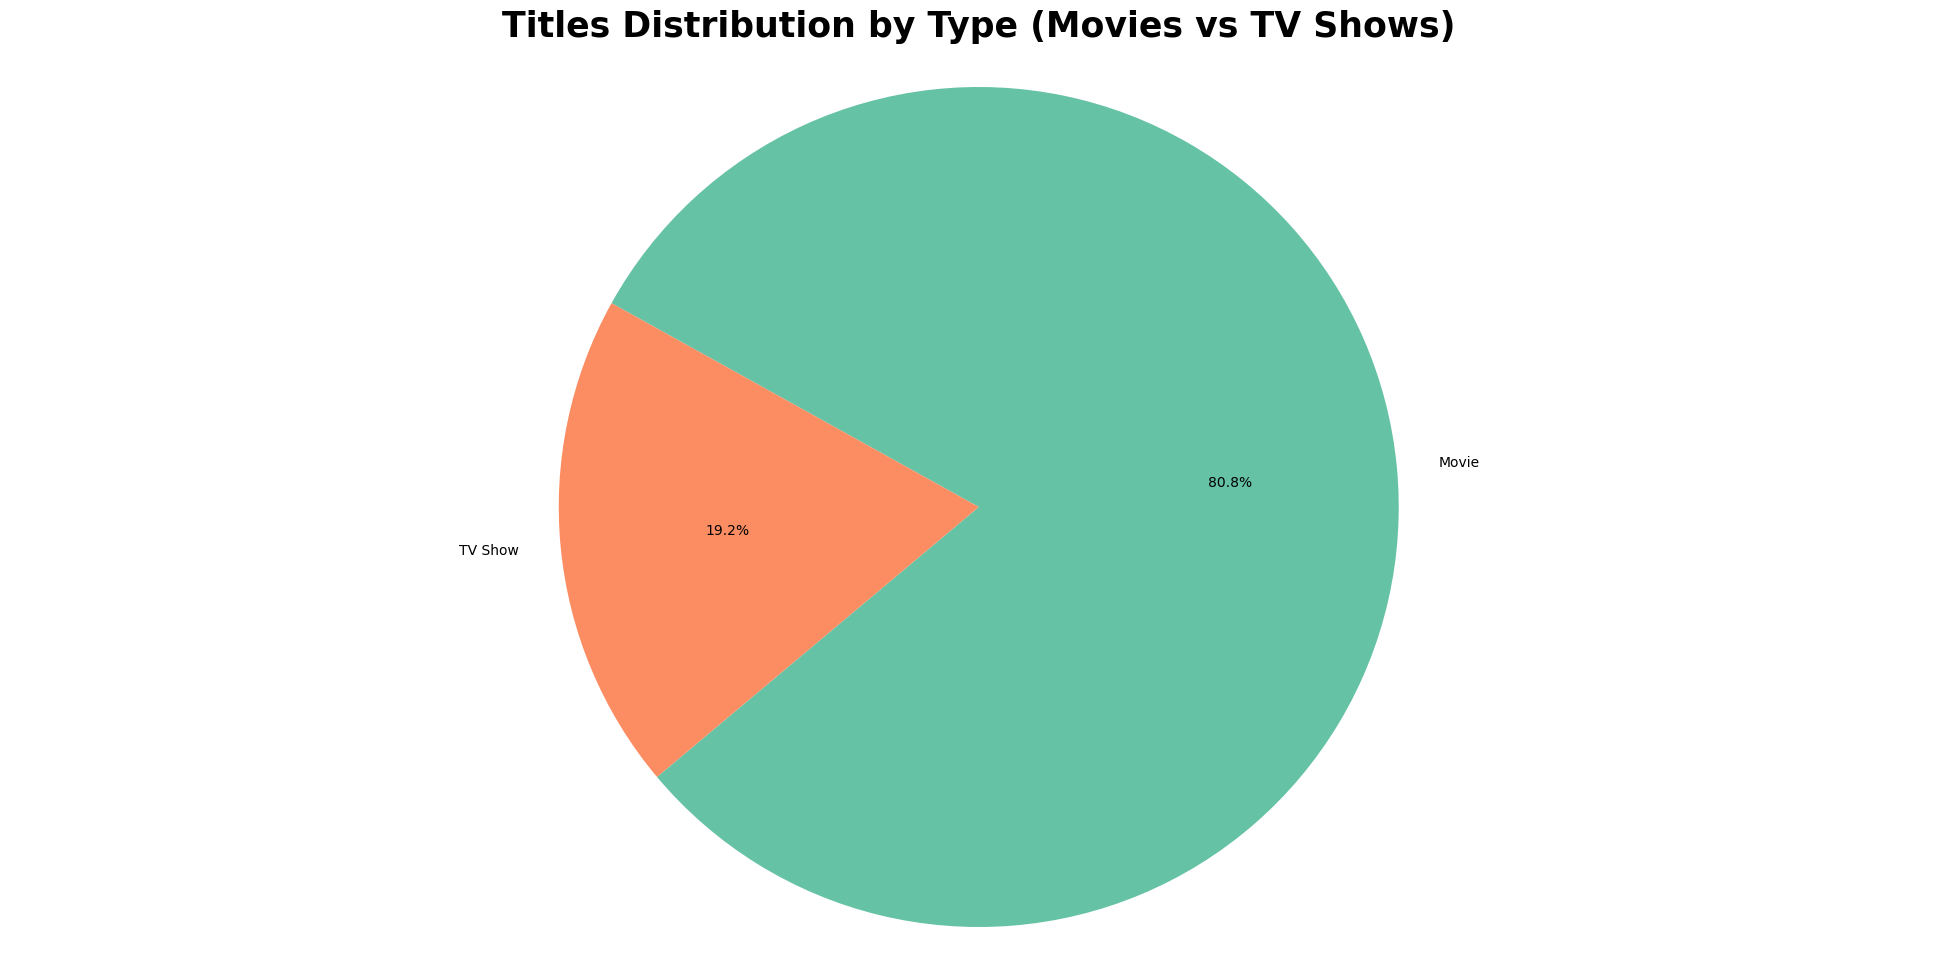

In [120]:
labels = df['type'].value_counts().index
sizes = df['type'].value_counts().values
colors = sns.color_palette('Set2')
plt.figure(figsize = (25, 12))
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 220)
plt.title('Titles Distribution by Type (Movies vs TV Shows)', fontsize = 25, fontweight = "bold")
plt.axis('equal')
plt.show()

# Titles added over time (Year-Wise)

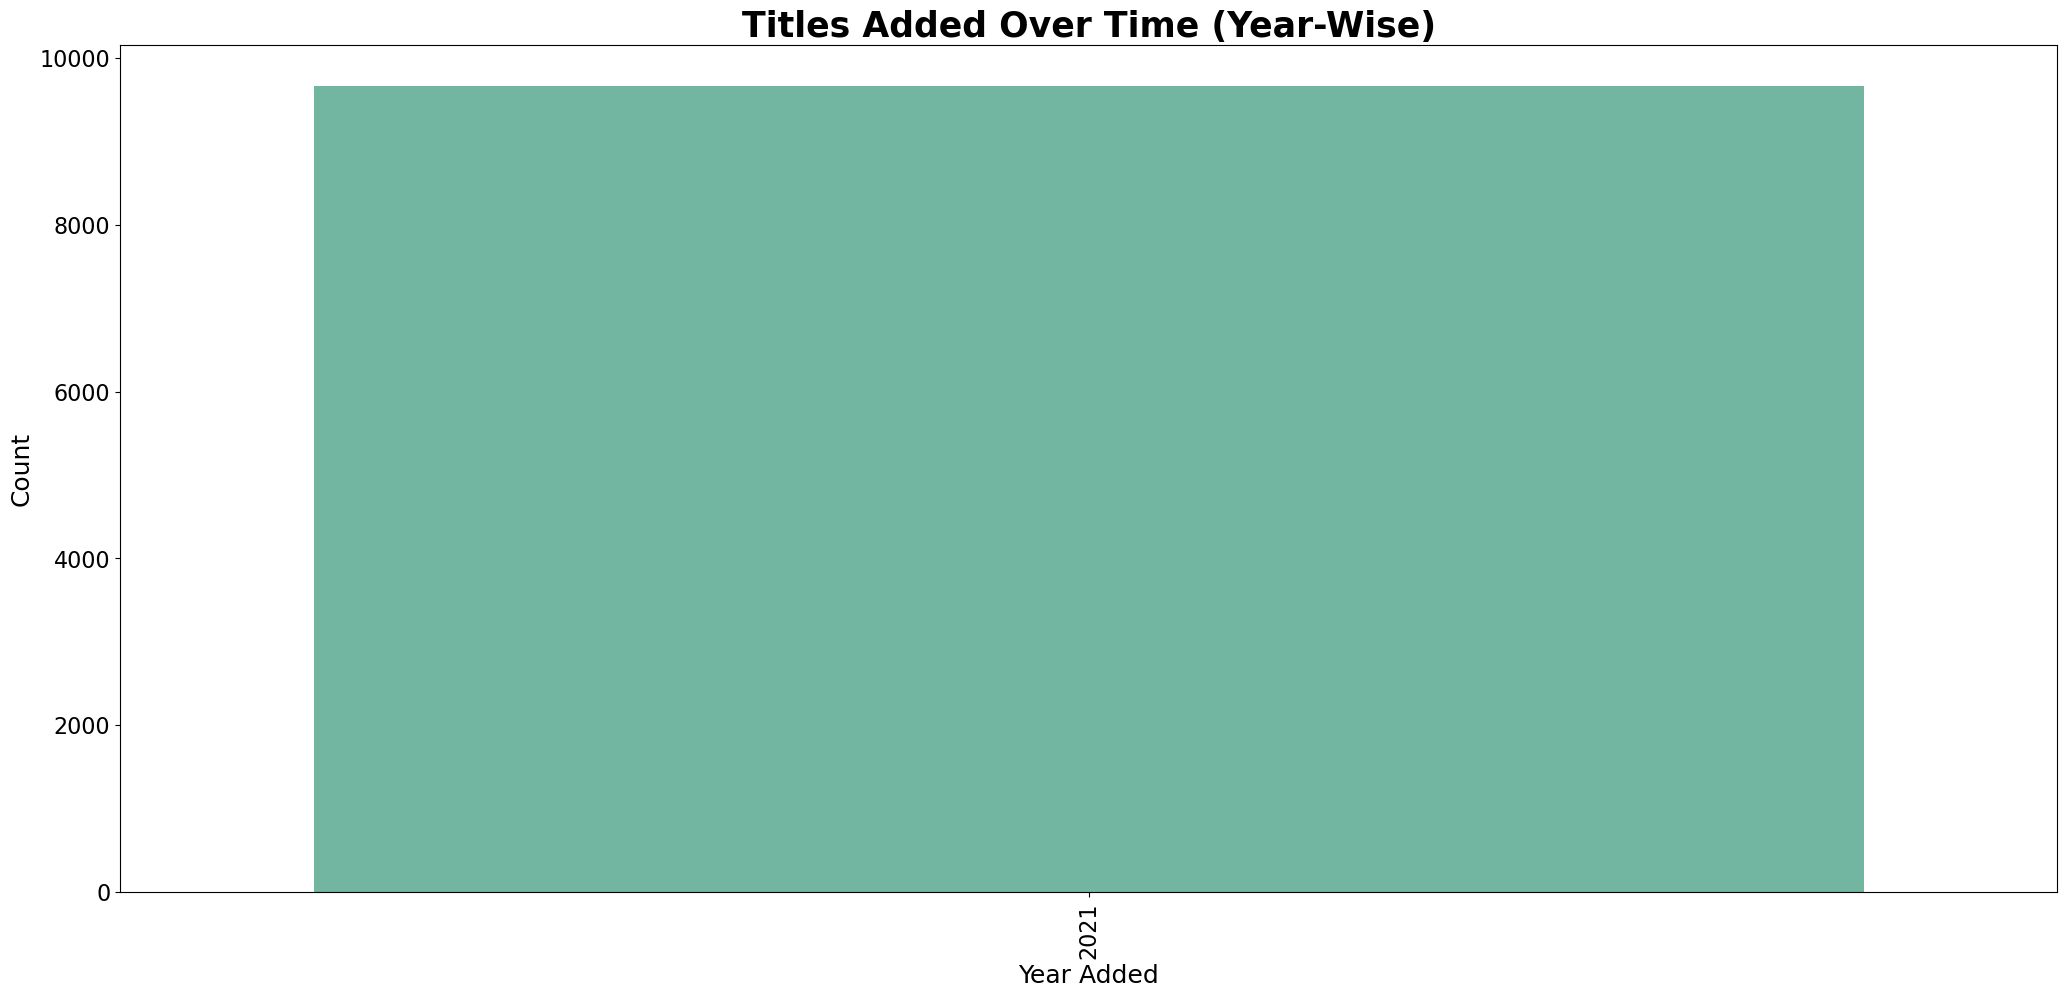

In [127]:
df['year_added'] = pd.to_datetime(df['date_added'], errors = 'coerce').dt.year
plt.figure(figsize = (25, 11))
sns.countplot(x = 'year_added', data = df, palette = 'Set2', order = df['year_added'].value_counts().index)
plt.title('Titles Added Over Time (Year-Wise)',  fontsize = 25, fontweight = "bold")
plt.xlabel('Year Added', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

## Most frequent generes

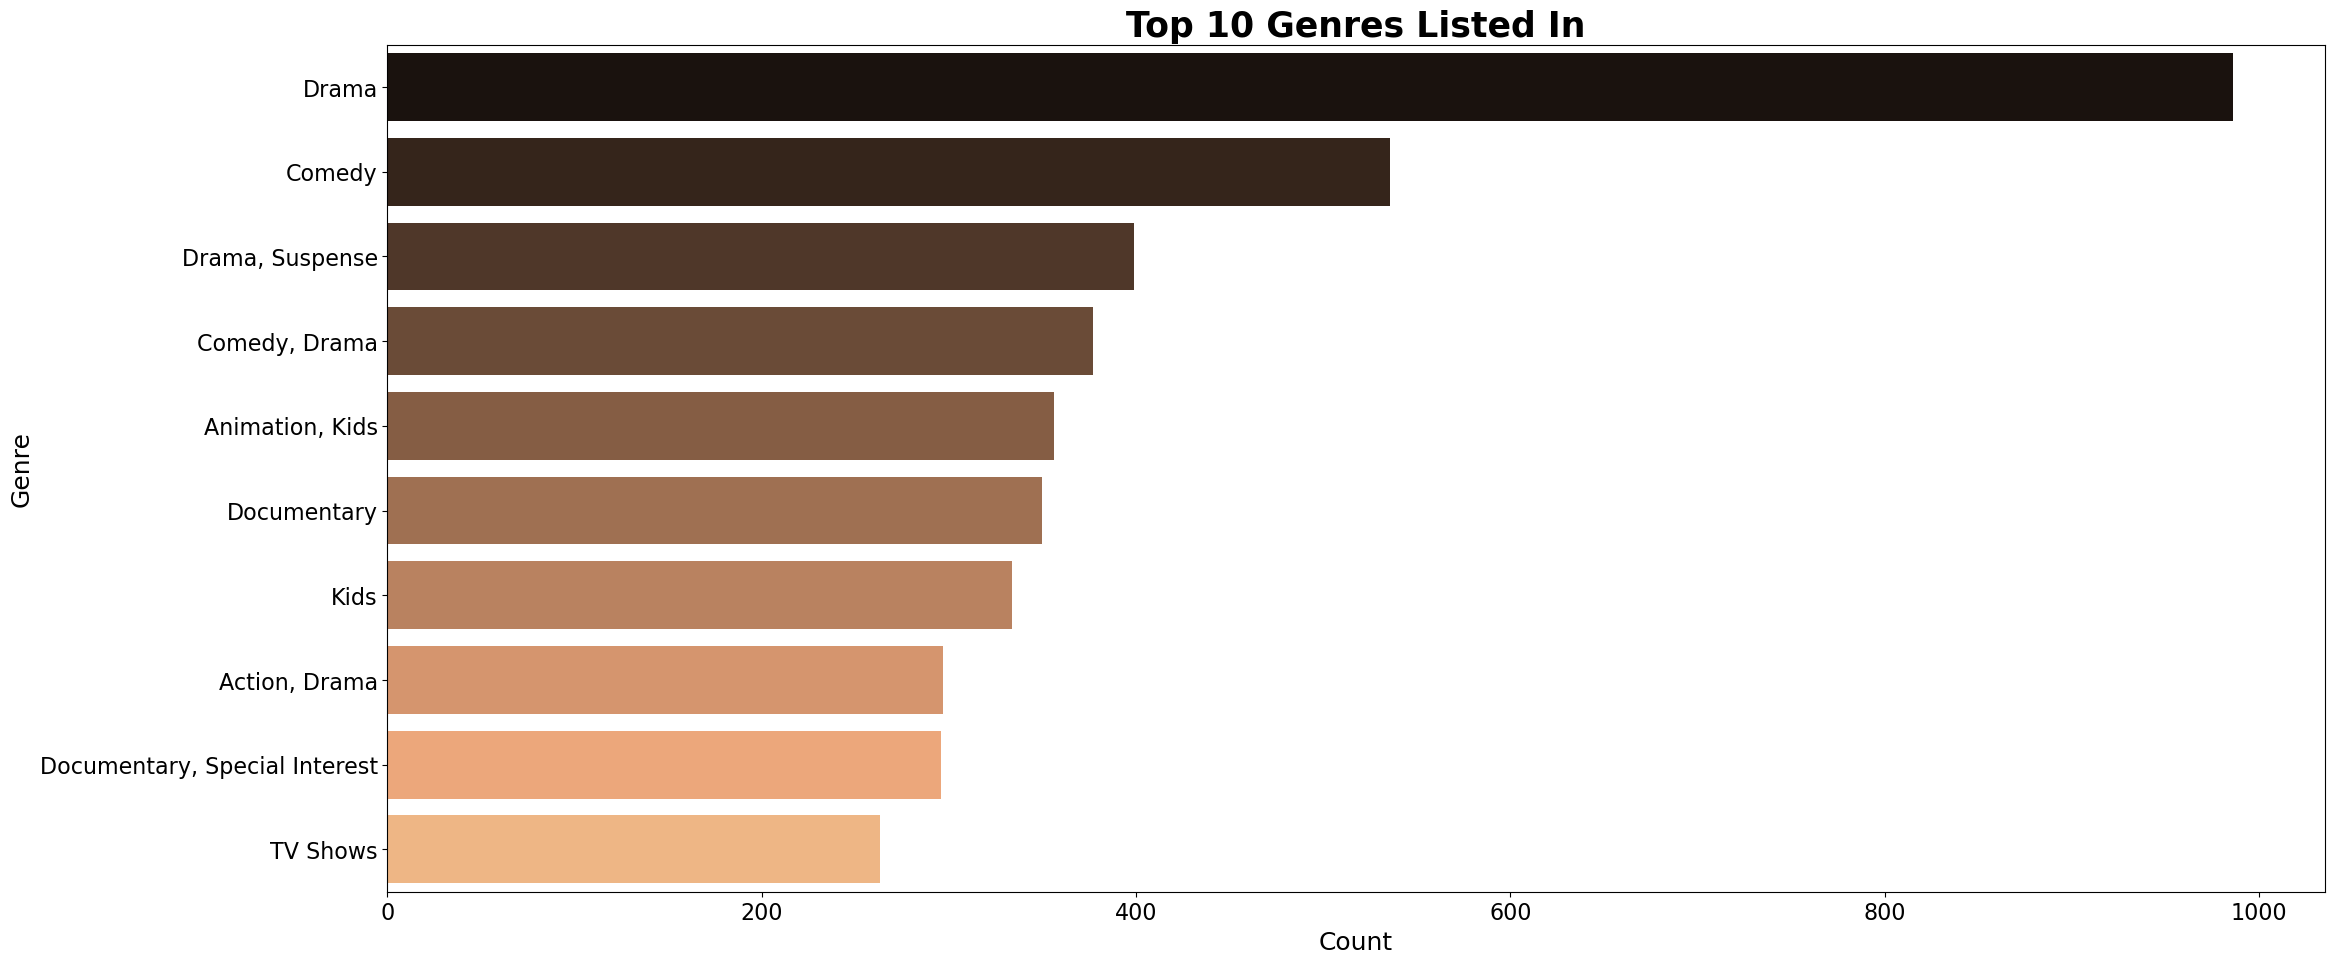

In [128]:

top_genres = df['listed_in'].value_counts().nlargest(10)
plt.figure(figsize = (25, 11))
sns.barplot(y = top_genres.index, x = top_genres.values, palette = 'copper')
plt.title('Top 10 Genres Listed In', fontsize = 25, fontweight = "bold")
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Genre', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

# Popular Words in titles

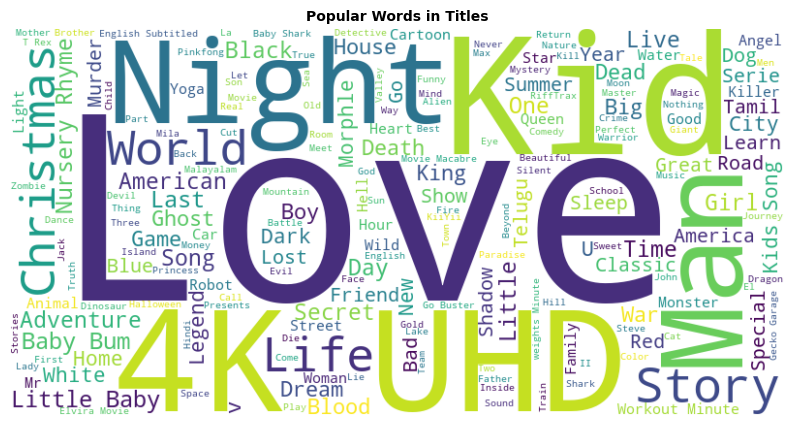

In [130]:
from wordcloud import WordCloud

# Generate word cloud for titles
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(' '.join(df['title']))

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Words in Titles', fontsize = 10, fontweight = "bold")
plt.show()

## Relationship between release year and duration

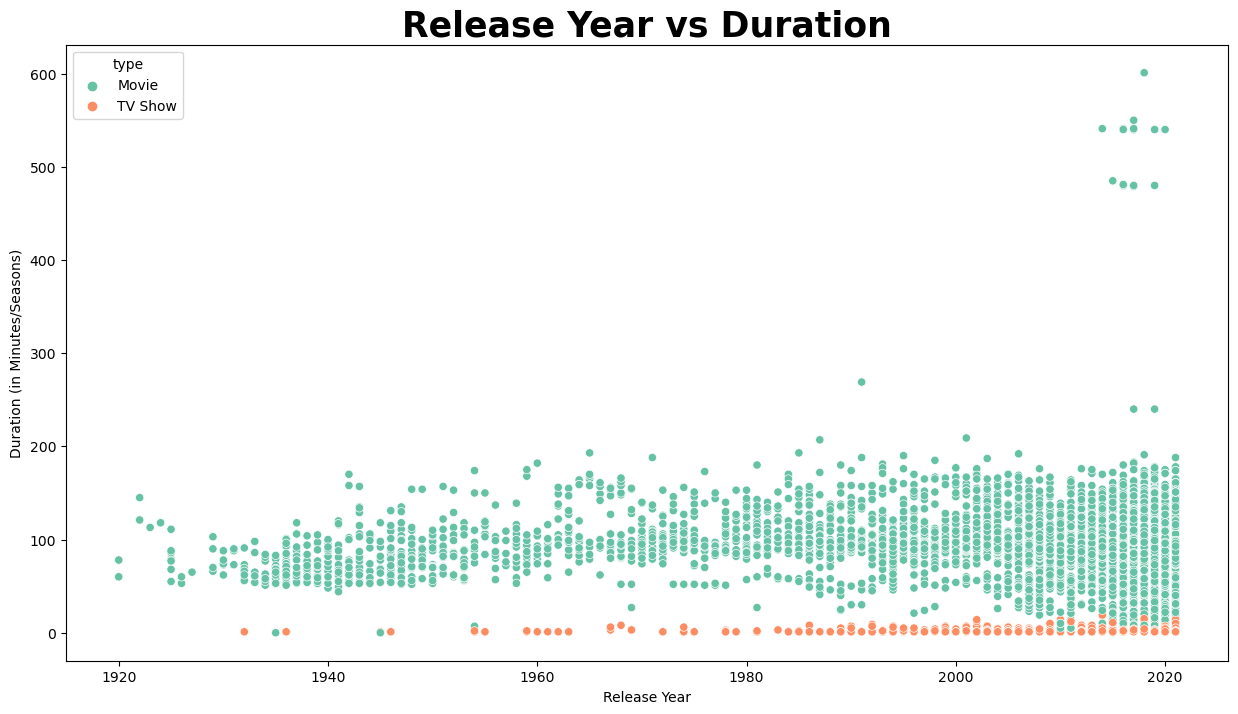

In [134]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize = (15, 8))
sns.scatterplot(x='release_year', y='duration_num', hue='type', data=df, palette='Set2')
plt.title('Release Year vs Duration', fontsize = 25, fontweight = "bold")
plt.xlabel('Release Year')
plt.ylabel('Duration (in Minutes/Seasons)')
plt.show()

## Titles by country

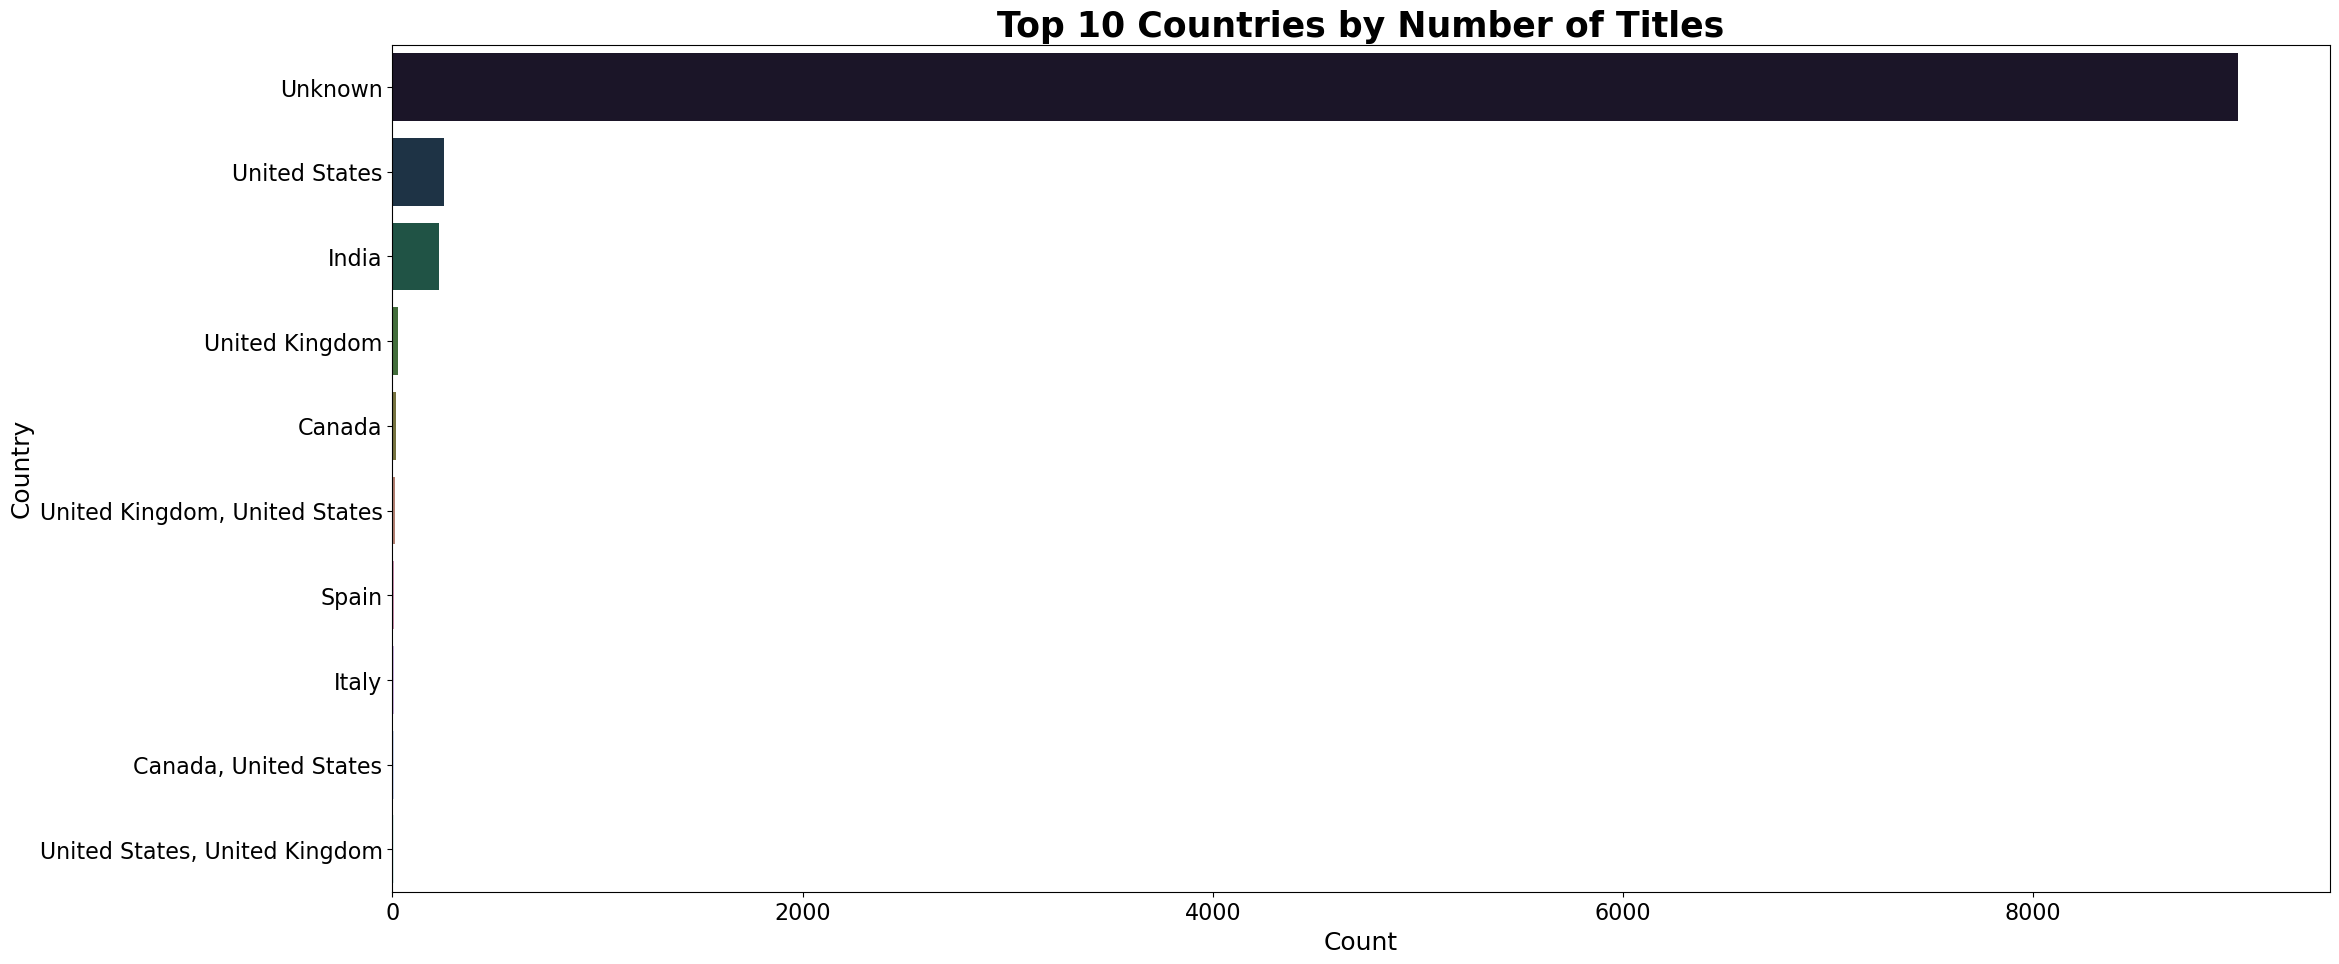

In [135]:
plt.figure(figsize = (25, 11))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(y = top_countries.index, x = top_countries.values, palette = 'cubehelix')
plt.title('Top 10 Countries by Number of Titles', fontsize = 25, fontweight = "bold")
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Country', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()